<a href="https://colab.research.google.com/github/ortall0201/Spotify--PopularityClustersNN/blob/main/Manor/Dataset_cleaning_ad_EDA_based_on_approach_A_and_B_notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**


**Data set** used for analysis was found on Kaggle -
https://www.kaggle.com/datasets/priyamchoksi/spotify-dataset-114k-songs

# **Columns Description:**

**track_id:** The unique Spotify ID for each track.

**artists:** Names of the artists who performed the track, separated by ';'.

**album_name:** The name of the album in which the track appears.

**track_name:** The title of the track.

**popularity:** A value between 0 and 100, indicating the track's popularity based on recent plays.

**duration_ms:** The length of the track in milliseconds.

**explicit:** Boolean indicating whether the track contains explicit content.

**danceability:** Describes how suitable a track is for dancing (0.0 = least danceable, 1.0 = most danceable).

**energy:** Represents the intensity and activity of a track (0.0 = low energy, 1.0 = high energy).

**key:** The musical key of the track mapped using standard Pitch Class notation.

**loudness:** Overall loudness of the track in decibels (dB).

**mode:** Indicates the modality (major or minor) of the track.

**speechiness:** Detects the presence of spoken words in the track.

**acousticness:** Confidence measure of whether the track is acoustic (0.0 = not acoustic, 1.0 = highly acoustic).

**instrumentalness:** Predicts whether a track contains vocals (0.0 = contains vocals, 1.0 = instrumental).

**liveness:** Detects the presence of an audience in the recording (0.0 = studio recording, 1.0 = live performance).

**valence:** Measures the musical positiveness conveyed by a track (0.0 = negative, 1.0 = positive).

**tempo:** Estimated tempo of the track in beats per minute (BPM).

**time_signature:** Estimated time signature of the track (3 to 7).

Each track is associated with a specific genre labeled under **track_genre**.




# .2. **Exploratory Data Analysis (EDA)**


## 2.1 **Data Loading and Initial Inspection**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import regex as re
import seaborn as sns

In [2]:
def csv_drive_path_generator(url):
    """
    Generates a direct download link from a Google Drive URL to read CSV files.

    Args:
    url (str): Google Drive sharing link for the CSV file.

    Returns:
    str: Direct link to download the CSV file.
    """
    # Extract the file ID from the Google Drive link
    file_id = url.split('/')[-2]
    # Create a direct download link
    path = f'https://drive.google.com/uc?export=download&id=1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk'

    return path


In [3]:
import pandas as pd


# Replace this with your Google Drive file link
drive_link = 'https://drive.google.com/file/d/1lVktfiPQa6R5nqWpPKDLMLWIolDZgiUk/view?usp=sharing'

# Generate the direct download link
csv_path1 = csv_drive_path_generator(drive_link)

# Read the CSV directly into a DataFrame
df = pd.read_csv(csv_path1)

# Display the first few rows to confirm it's loaded correctly
df.head()

# Get an overview of the dataset
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

,0
Unnamed: 0,0
track_id,0
artists,1
album_name,1
track_name,1
popularity,0
duration_ms,0
explicit,0
danceability,0
energy,0


In [4]:

print("~"*100)
# Check for Missing Values
print(df.isna().sum())
#missing values in the following featureas: 'artists', 'album_name','track_name'. Later we will drop the missing values.


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [5]:
df = df.drop(columns=['Unnamed: 0'])

df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [6]:

#We want to see the min-max values for the different quantitiative features:

for column in df.select_dtypes(include='number').columns:
    print(f"{column} - Min: {df[column].min()}, Max: {df[column].max()}")


#There is a variation in the scale for the different features, Later we will standardized/scale them.


popularity - Min: 0, Max: 100
duration_ms - Min: 0, Max: 5237295
danceability - Min: 0.0, Max: 0.985
energy - Min: 0.0, Max: 1.0
key - Min: 0, Max: 11
loudness - Min: -49.531, Max: 4.532
mode - Min: 0, Max: 1
speechiness - Min: 0.0, Max: 0.965
acousticness - Min: 0.0, Max: 0.996
instrumentalness - Min: 0.0, Max: 1.0
liveness - Min: 0.0, Max: 1.0
valence - Min: 0.0, Max: 0.995
tempo - Min: 0.0, Max: 243.372
time_signature - Min: 0, Max: 5


In [7]:
df['explicit'].value_counts() #Less then 10% of the df has explicit=TRUE(bad words/not for children)

,count
explicit,
False,104253
True,9747


In [ ]:
# Check if the 'explicit' column contains any non-boolean values
non_bool_values = ~df['explicit'].isin([True, False])

# Display rows with non-boolean values in 'explicit' column
df[non_bool_values]
#There are 0 non-boolean values in explicit

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre


In [8]:
#Need to change explicit from Boolean type to int for later analytics:
df['explicit'] = df['explicit'].map({True: 1, False: 0})

df['explicit'].unique()




array([0, 1])

In [9]:
df['explicit'].value_counts()

,count
explicit,
0,104253
1,9747


In [10]:
# Convert the 'speechiness' column to numeric, setting non-numeric values to NaN
non_numeric_values = pd.to_numeric(df['speechiness'], errors='coerce')

# Check for rows where 'speechiness' contains non-numeric values
non_numeric_rows = df[non_numeric_values.isna()]

# Display rows with non-numeric values in 'speechiness' column
non_numeric_rows


#There are 0 non_numeric_rows in speechiness
df['speechiness'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: speechiness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [11]:

# Same here: Convert the 'loudness' column to numeric, setting non-numeric values to NaN
non_numeric_values2 = pd.to_numeric(df['loudness'], errors='coerce')

# Check for rows where 'loudness' contains non-numeric values
non_numeric_rows2 = df[non_numeric_values2.isna()]

# Display rows with non-numeric values in 'loudness' column
print(non_numeric_rows2)
df['loudness'].info()


Empty DataFrame
Columns: [track_id, artists, album_name, track_name, popularity, duration_ms, explicit, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature, track_genre]
Index: []
<class 'pandas.core.series.Series'>
RangeIndex: 114000 entries, 0 to 113999
Series name: loudness
Non-Null Count   Dtype  
--------------   -----  
114000 non-null  float64
dtypes: float64(1)
memory usage: 890.8 KB


In [12]:

# Convert the 'tempo' column to numeric type
df['tempo'] = pd.to_numeric(df['tempo'])

# Convert the 'valence' column to numeric type
df['valence'] = pd.to_numeric(df['valence'])

In [13]:


# Convert the 'popularity' column to numeric type because of NaN types recognized in this column
df['popularity'] = pd.to_numeric(df['popularity'])

df['popularity'].isnull().sum()



0

In [14]:

######## looking for missing values-we saw in the info that there are missing values in the folowing variables:
# 'album_name', 'artists',  'track_name'. We want to see how many missing values in each feature:


column_name = 'album_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)



column_name = 'artists'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########
# Specify the column you are interested in
column_name = 'track_name'

# Get the index of rows where the column has missing values
missing_value_indices = df[df[column_name].isnull()].index

# Convert to a list for easier use or display
missing_value_indices_list = missing_value_indices.tolist()

print(f"Indices with missing values in column '{column_name}':")
print(missing_value_indices_list)

#########

#We will drop them in the data cleaning




Indices with missing values in column 'album_name':
[65900]
Indices with missing values in column 'artists':
[65900]
Indices with missing values in column 'track_name':
[65900]


In [15]:
# df.iloc[65900]
df[df["track_id"] == "1kR4gIb7nGxHPI3D2ifs59"]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,0,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


## 2.2 **Data cleaning**

Checking duplicates

In [16]:
df[df.duplicated(keep=False)].sort_values(by="track_id")

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
52766,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,0,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
52714,00JZ83w0Qm09f4PwWj06sM,George Jones,With Love,A Good Year For The Roses,12,190546,0,0.491,0.334,11,-9.684,1,0.0287,0.659,0.000016,0.1160,0.2490,91.674,4,honky-tonk
39275,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,0,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
39307,02KmEChUwcjxG3G29kbLFT,Hans Zimmer;Henning Lohner;Martin Tillman;Fiac...,Hans Zimmer: Epic Scores,Shelter Mountain,16,250520,0,0.144,0.262,9,-21.228,1,0.0641,0.876,0.755000,0.1440,0.0345,94.430,4,german
93376,02MRylJ1WAgxzdqfNfdIsR,Oleg Pogudin,Любовь и разлука. Песни Исаака Шварца,"Город пышный, город бедный",0,114600,0,0.446,0.121,4,-12.737,0,0.0414,0.937,0.000000,0.1250,0.1800,107.573,3,romance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52570,7zBY3YjvcdkpbHIUx0fe5Q,Hank Williams,Hank Williams As Luke The Drifter (Expanded Ed...,Everything's Okay,12,172026,0,0.607,0.378,7,-13.581,1,0.1480,0.837,0.000000,0.0752,0.8700,73.728,4,honky-tonk
93290,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,0,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
93328,7zkgAyL3DS6PE5FWzk3QKM,Vladimir Nechaev,Душевные песни из советских кинофильмов,"Ты рядом со мной - Из к/ф ""Наши соседи""",1,207438,0,0.336,0.315,2,-10.006,0,0.0312,0.875,0.000004,0.4260,0.4540,147.996,3,romance
16919,7zo05whm8LBnnt1dG979ov,Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...,Mozart - A Classical Dawn,"Six German Dances, K.571: No. 5 in B Flat Major",3,92000,0,0.539,0.158,10,-15.544,1,0.0356,0.976,0.498000,0.1510,0.6850,88.180,3,classical


In [17]:
df = df.drop_duplicates()


Checking duplicates for track_id

In [18]:

# Check for duplicate values in the 'track_id' column
df[df['track_id'].duplicated(keep=False)].sort_values(by="track_id")

# 40108 DUPLICATES in track_id#######

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15028,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,0,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,chill
103211,001APMDOl3qtx1526T11n1,Pink Sweat$;Kirby,New RnB,Better,0,176320,0,0.613,0.471,1,-6.644,0,0.1070,0.316000,0.000001,0.1170,0.406,143.064,4,soul
85578,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,0,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,punk-rock
100420,001YQlnDSduXd5LgBd66gT,Soda Stereo,Soda Stereo (Remastered),El Tiempo Es Dinero - Remasterizado 2007,38,177266,0,0.554,0.921,2,-4.589,1,0.0758,0.019400,0.088100,0.3290,0.700,183.571,1,ska
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,0,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.000000,0.0995,0.236,148.033,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,1,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,death-metal
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,1,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.859000,0.0730,0.677,133.987,4,metalcore
3100,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,0,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alternative
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,0,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock


In [19]:
# Find unique track_id values that are duplicated
df['track_id'][df['track_id'].duplicated()].unique()



array(['5E30LdtzQTGqRvNd7l6kG5', '2K7xn816oNHJZ0aVqdQsha',
       '2QjOHCTQ1Jl3zawyYOpxh6', ..., '71dLJx3qHOTQMTvvoE2dmd',
       '6OG5TBCmuTOuWCzSGsETrE', '7xsirhcgFWOnItsGuBfrv9'], dtype=object)

In [20]:

#We want to see how many duplicates there are in the track_id
#  Get the count of all track_ids
track_id_counts = df['track_id'].value_counts()

# Filter out track_ids that appear more than once (i.e., duplicates)
duplicated_track_id_summary = track_id_counts[track_id_counts > 1]

# Display the count of duplicated track_ids
print(duplicated_track_id_summary)

#16299 number of unique track_ids that have duplicates

track_id
6S3JlDAGk3uu3NtZbPnuhS    9
2kkvB3RNRzwjFdGhaUA0tz    8
2Ey6v4Sekh3Z0RUSISRosD    8
4XYieGKSlJlHpzB3bl6WMP    7
2qgXrzJsry4KgYoJCpuaul    7
                         ..
3VbGCXWRiouAq8VyMYN2MI    2
6hufSKKiNAOUdS5JVym6hu    2
1170VohRSx6GwE6QDCHPPH    2
5xo8RrjJ9CVNrtRg2S3B1R    2
0DuWDLjriRPjDRoPgaCslY    2
Name: count, Length: 16299, dtype: int64


In [21]:
df['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [22]:
# Grouping track_genre into 10 broader categories.

# Define genres for each group
electronic_genres=['electronic', 'idm', 'hardstyle', 'detroit-techno', 'chill', 'club', 'trance', 'deep-house', 'minimal-techno', 'dubstep', 'techno', 'progressive-house', 'house',
    'garage', 'disco', 'dance', 'chicago-house', 'edm', 'drum-and-bass', 'breakbeat', 'trip-hop', 'electro', 'industrial']

pop_genres=['pop', 'power-pop', 'synth-pop', 'indie-pop', 'j-pop', 'k-pop', 'cantopop', 'pop-film', 'dancehall', 'j-dance', 'party']

rock_genres = ['rock', 'rock-n-roll', 'alt-rock', 'alternative', 'hard-rock', 'metal', 'heavy-metal', 'black-metal', 'death-metal', 'metalcore',
      'grunge', 'emo', 'psych-rock', 'hardcore', 'goth', 'punk', 'punk-rock', 'grindcore', 'j-rock','indie']

hiphop_genres = ['hip-hop', 'r-n-b', 'rap']

world_genres = ['latin', 'latino', 'salsa', 'samba', 'brazil', 'forro', 'pagode', 'tango', 'french', 'german', 'british', 'iranian', 'indian', 'turkish', 'world-music', 'mandopop', 'mpb', 'malay', 'spanish', 'swedish']

Classical_Instrumental=['classical', 'piano', 'guitar', 'ambient', 'new-age', 'sleep', 'study']

jazz_blues_genres = ['jazz', 'blues', 'funk', 'groove', 'soul', 'acoustic', 'gospel', 'singer-songwriter']

Country_Folk=['country', 'folk', 'honky-tonk', 'bluegrass','rockabilly', 'sertanejo']

Specialty_Other= ['anime', 'show-tunes', 'opera', 'comedy', 'disney', 'children', 'study', 'happy', 'sleep', 'kids', 'romance', 'sad', 'songwriter', 'j-idol']

Reggae_Afrobeat=['reggae', 'dub', 'afrobeat', 'ska','reggaeton']



In [23]:

# Create an empty mapping dictionary
genre_to_group = {}

# Assign genres to their corresponding groups
genre_to_group.update({genre: 'Electronic' for genre in electronic_genres})
genre_to_group.update({genre: 'Pop' for genre in pop_genres})
genre_to_group.update({genre: 'Rock' for genre in rock_genres})
genre_to_group.update({genre: 'Hip-Hop' for genre in hiphop_genres})
genre_to_group.update({genre: 'World' for genre in world_genres})
genre_to_group.update({genre: 'Classical/Instrumental' for genre in Classical_Instrumental})


genre_to_group.update({genre: 'Jazz/Blues' for genre in jazz_blues_genres})
genre_to_group.update({genre: 'Folk/Country' for genre in Country_Folk})
genre_to_group.update({genre: 'Specialty' for genre in Specialty_Other})

genre_to_group.update({genre: 'Reggae/Afrobeat' for genre in Reggae_Afrobeat})

# Now, use this final mapping dictionary to map genres in your dataframe
df['genre_group'] = df['track_genre'].map(genre_to_group)
df['genre_group'].unique()

array(['Jazz/Blues', 'Reggae/Afrobeat', 'Rock', 'Classical/Instrumental',
       'Specialty', 'Folk/Country', 'World', 'Electronic', 'Pop',
       'Hip-Hop'], dtype=object)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113550 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113550 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113550 non-null  int64  
 5   duration_ms       113550 non-null  int64  
 6   explicit          113550 non-null  int64  
 7   danceability      113550 non-null  float64
 8   energy            113550 non-null  float64
 9   key               113550 non-null  int64  
 10  loudness          113550 non-null  float64
 11  mode              113550 non-null  int64  
 12  speechiness       113550 non-null  float64
 13  acousticness      113550 non-null  float64
 14  instrumentalness  113550 non-null  float64
 15  liveness          113550 non-null  float64
 16  valence           113550 

In [25]:
print(df['genre_group'].value_counts().sum())

113550


In [29]:
df_gen = df.drop("track_genre", axis=1)

In [27]:
# df_gen = df_gen.drop_duplicates()

In [30]:
len(df_gen) #df with super-genre-categories only, after removing duplicates

113550

In [32]:
pivot_df = pd.crosstab(df_gen['track_id'], df_gen['genre_group']).reset_index()

In [33]:
# print(pivot_df['track_id'].duplicated().sum())
pivot_df.head()

genre_group,track_id,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World
0,0000vdREvCVMxbQTkS888c,0,0,0,0,0,0,0,0,0,1
1,000CC8EParg64OmTxVnZ0p,0,1,0,0,0,0,0,0,0,0
2,000Iz0K615UepwSJ5z2RE5,0,1,0,0,0,0,0,0,0,0
3,000RDCYioLteXcutOjeweY,0,0,0,1,0,0,0,0,0,0
4,000qpdoc97IMTBvF8gwcpy,0,1,0,0,0,0,0,0,0,0


In [34]:
pivot_df['count_1_or_more'] = (pivot_df.iloc[:, 1:] >= 1).sum(axis=1)


In [35]:
pivot_df.head()

genre_group,track_id,Classical/Instrumental,Electronic,Folk/Country,Hip-Hop,Jazz/Blues,Pop,Reggae/Afrobeat,Rock,Specialty,World,count_1_or_more
0,0000vdREvCVMxbQTkS888c,0,0,0,0,0,0,0,0,0,1,1
1,000CC8EParg64OmTxVnZ0p,0,1,0,0,0,0,0,0,0,0,1
2,000Iz0K615UepwSJ5z2RE5,0,1,0,0,0,0,0,0,0,0,1
3,000RDCYioLteXcutOjeweY,0,0,0,1,0,0,0,0,0,0,1
4,000qpdoc97IMTBvF8gwcpy,0,1,0,0,0,0,0,0,0,0,1


In [36]:
# Calculate value counts
word_counts = pivot_df['count_1_or_more'].value_counts()

# Calculate percentages
percentages = word_counts / word_counts.sum() * 100

# Calculate cumulative percentages
cumulative_percentages = percentages.cumsum()

# Combine into a single DataFrame
result = pd.DataFrame({
    'Count': word_counts,
    'Percentage': percentages,
    'Cumulative Percentage': cumulative_percentages
})

# Display the result
print(result)

# 87.7% of the songs has only one super category - this is the df to use

                 Count  Percentage  Cumulative Percentage
count_1_or_more                                          
1                78718   87.716874              87.716874
2                 9188   10.238353              97.955227
3                 1451    1.616875              99.572102
4                  329    0.366611              99.938713
5                   33    0.036772              99.975485
6                   22    0.024515             100.000000


In [37]:
# Step 1: Filter pivot_df for rows where "count_more_than_1" is 1
filtered_pivot_df = pivot_df[pivot_df['count_1_or_more'] == 1]

# Step 2: Get the list of track_ids that satisfy the condition
track_ids_to_filter = filtered_pivot_df['track_id']

# Step 3: Filter df_gen based on the track_ids
filtered_df_gen = df_gen[df_gen['track_id'].isin(track_ids_to_filter)]



In [38]:
# Check again for duplicate values in the 'track_id' column
filtered_df_gen[filtered_df_gen['track_id'].duplicated(keep=False)].sort_values(by="track_id")

# it appears that there are songs with two popularity scores, we will take the rows with the highest score


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_group
91801,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,0,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.0000,0.0995,0.236,148.033,4,Rock
2106,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,0,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.0000,0.0995,0.236,148.033,4,Rock
3257,003vvx7Niy0yvhvHt4a68B,The Killers,Hot Fuss,Mr. Brightside,86,222973,0,0.352,0.911,1,-5.230,1,0.0747,0.001210,0.0000,0.0995,0.236,148.033,4,Rock
8095,00970cTs7LnxWt0d5Qk08m,Ella Fitzgerald,Weihnachtslieder 2022,Sleigh Ride,0,175986,0,0.593,0.287,1,-12.472,1,0.0469,0.764000,0.0000,0.1530,0.639,77.117,4,Jazz/Blues
64246,00970cTs7LnxWt0d5Qk08m,Ella Fitzgerald,Weihnachtslieder 2022,Sleigh Ride,0,175986,0,0.593,0.287,1,-12.472,1,0.0469,0.764000,0.0000,0.1530,0.639,77.117,4,Jazz/Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22326,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,1,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.8590,0.0730,0.677,133.987,4,Rock
72679,7zv2vmZq8OjS54BxFzI2wM,Attila,Soundtrack to a Party (Bonus),Lets Start the Party,25,125859,1,0.592,0.932,1,-5.412,1,0.0558,0.000005,0.8590,0.0730,0.677,133.987,4,Rock
2004,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,0,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.0791,0.1520,0.387,88.036,4,Rock
91401,7zwn1eykZtZ5LODrf7c0tS,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,You Get Me So High,83,153000,0,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.0791,0.1520,0.387,88.036,4,Rock


In [39]:
# Remove duplicates, keeping the row with the highest popularity for each track_id
filtered_df_gen = filtered_df_gen.loc[
    filtered_df_gen.groupby('track_id')['popularity'].idxmax()
]

# Reset the index (optional, for cleaner output)
filtered_df_gen.reset_index(drop=True, inplace=True)

# Display the result
filtered_df_gen


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_group
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,1,0.910,0.37400,8,-9.844,0,0.1990,0.075700,0.00301,0.1540,0.432,104.042,4,World
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,0,0.269,0.51600,0,-7.361,1,0.0366,0.406000,0.00000,0.1170,0.341,178.174,4,Electronic
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,0,0.686,0.56000,5,-13.264,0,0.0462,0.001140,0.18100,0.1110,0.108,119.997,4,Electronic
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,0,0.679,0.77000,0,-3.537,1,0.1900,0.058300,0.00000,0.0825,0.839,161.721,4,Hip-Hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,0,0.519,0.43100,6,-13.606,0,0.0291,0.000964,0.72000,0.0916,0.234,129.971,4,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78713,7zxHiMmVLt4LGWpOMqOpUh,Haricharan;Gopi Sundar,Bangalore Days,"Aethu Kari Raavilum - From ""Bangalore Days""",56,325156,0,0.766,0.38200,7,-11.464,0,0.0324,0.698000,0.00143,0.1570,0.672,119.992,4,Pop
78714,7zxpdh3EqMq2JCkOI0EqcG,Piano Genie,Disney Favourites,"Two Worlds (From ""Tarzan"")",23,109573,0,0.529,0.00879,10,-32.266,1,0.0587,0.996000,0.95900,0.0916,0.510,82.694,4,Specialty
78715,7zyYmIdjqqiX6kLryb7QBx,Eric Chou,學著愛,以後別做朋友,61,260573,0,0.423,0.36000,3,-9.458,1,0.0372,0.728000,0.00000,0.1050,0.291,130.576,4,World
78716,7zybSU9tFO9HNlwmGF7stc,Stereoclip,Echoes,Sunset Drive,54,234300,0,0.649,0.83400,10,-11.430,0,0.0397,0.268000,0.93200,0.0974,0.150,125.004,4,Electronic


In [40]:
filtered_df_gen[filtered_df_gen['track_id'].duplicated(keep=False)].sort_values(by="track_id")

# no duplicates left


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_group


In [41]:
final_df = filtered_df_gen.copy()

In [42]:
final_df['genre_group'].nunique()

10

In [43]:
final_df['genre_group'].isna().sum()

0

In [44]:
final_df['genre_group'].isnull().sum()

0

In [45]:
print(final_df.index.duplicated().sum())


0


In [ ]:
# Save the final2 DataFrame to a new CSV file
final_df.to_csv('final_clean_dataset_3.csv', index=False)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78718 entries, 0 to 78717
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          78718 non-null  object 
 1   artists           78717 non-null  object 
 2   album_name        78717 non-null  object 
 3   track_name        78717 non-null  object 
 4   popularity        78718 non-null  int64  
 5   duration_ms       78718 non-null  int64  
 6   explicit          78718 non-null  int64  
 7   danceability      78718 non-null  float64
 8   energy            78718 non-null  float64
 9   key               78718 non-null  int64  
 10  loudness          78718 non-null  float64
 11  mode              78718 non-null  int64  
 12  speechiness       78718 non-null  float64
 13  acousticness      78718 non-null  float64
 14  instrumentalness  78718 non-null  float64
 15  liveness          78718 non-null  float64
 16  valence           78718 non-null  float6

In [46]:
final_df['genre_group'].unique()

array(['World', 'Electronic', 'Hip-Hop', 'Specialty', 'Folk/Country',
       'Rock', 'Pop', 'Jazz/Blues', 'Reggae/Afrobeat',
       'Classical/Instrumental'], dtype=object)

In [ ]:
# generate 'genre_class' to map genre_group  to  int64 type becuase it is object:

# Define the genres and corresponding class labels
genres_to_map = {
    'Electronic': 0,
    'Pop': 1,
    'Rock': 2,
    'Hip-Hop': 3,
    'World': 4,
    'Classical/Instrumental': 5,
    'Jazz/Blues': 6,
    'Folk/Country': 7,
    'Specialty': 8,  # Keep only one 'Specialty'
    'Reggae/Afrobeat': 9  # Assign a unique label to Reggae/Afrobeat
}

# Map the genre_group to genre_class using the corrected mapping
final_df['genre_class'] = final_df['genre_group'].map(genres_to_map)


final_df['genre_class'].unique()



array([4, 0, 3, 8, 7, 2, 1, 6, 9, 5])

In [59]:
final_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,genre_group
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,1,0.91,0.37,8,-9.84,0,0.20,7.57e-02,3.01e-03,0.15,0.43,104.04,4,World
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,0,0.27,0.52,0,-7.36,1,0.04,4.06e-01,0.00e+00,0.12,0.34,178.17,4,Electronic
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,0,0.69,0.56,5,-13.26,0,0.05,1.14e-03,1.81e-01,0.11,0.11,120.00,4,Electronic
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,0,0.68,0.77,0,-3.54,1,0.19,5.83e-02,0.00e+00,0.08,0.84,161.72,4,Hip-Hop
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,0,0.52,0.43,6,-13.61,0,0.03,9.64e-04,7.20e-01,0.09,0.23,129.97,4,Electronic


## 2.3. **EDA and Visualization After Cleaning**

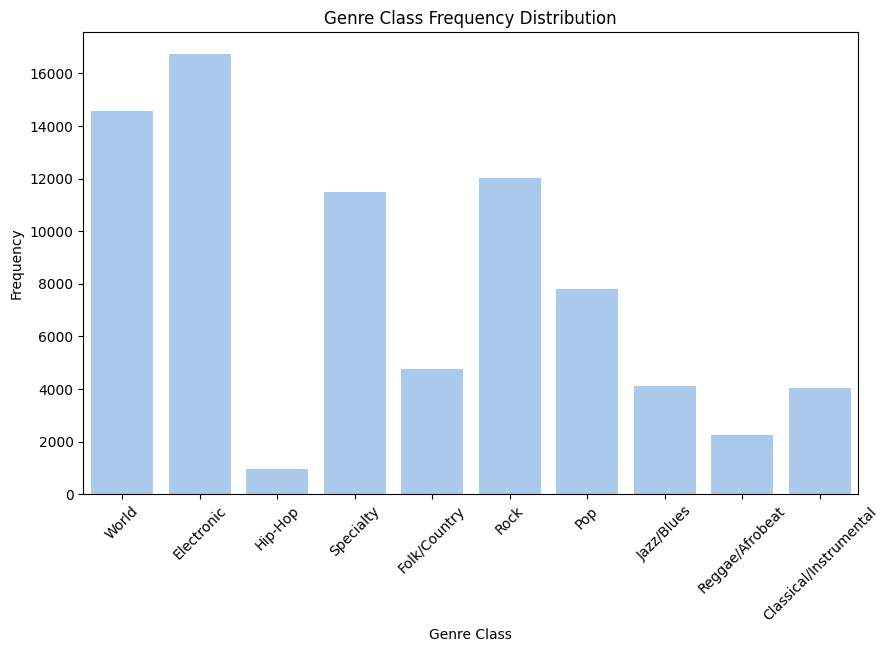

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set pastel palette
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='genre_group', data=final_df, color=sns.color_palette("pastel")[0])


plt.xlabel('Genre Class')
plt.ylabel('Frequency')
plt.title('Genre Class Frequency Distribution')

plt.xticks(rotation=45)
# Show the plot
plt.show()

#We can see that the groups are imbalanced. We will address this imbalance in the modeling process.



### 2.3.1 Descriptive statistics of the Features:

In [49]:
#Descriptive statistics of the Features:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,78718.0,32.723786,19.644031,0.000,19.00000,32.000000,47.0000,99.000
duration_ms,78718.0,230010.637351,116582.115687,0.000,172333.00000,213600.000000,265961.5000,5237295.000
explicit,78718.0,0.086270,0.280764,0.000,0.00000,0.000000,0.0000,1.000
danceability,78718.0,0.559411,0.178981,0.000,0.44600,0.574000,0.6910,0.985
energy,78718.0,0.634393,0.259406,0.000,0.45500,0.678000,0.8560,1.000
key,78718.0,5.279263,3.558962,0.000,2.00000,5.000000,8.0000,11.000
loudness,78718.0,-8.612938,5.336673,-49.531,-10.46875,-7.255000,-5.1320,4.532
mode,78718.0,0.632740,0.482061,0.000,0.00000,1.000000,1.0000,1.000
speechiness,78718.0,0.089457,0.117808,0.000,0.03620,0.049200,0.0873,0.965
acousticness,78718.0,0.331223,0.341244,0.000,0.01570,0.191000,0.6350,0.996


In [52]:
#Summary table for all vars

pd.set_option('display.precision', 2) #show only 2 digit after zero
final_df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,78718.00,7.87e+04,78718.00,78718.00,78718.00,78718.00,78718.00,78718.00,78718.00,78718.00,7.87e+04,78718.00,78718.00,78718.00,78718.00
mean,32.72,2.30e+05,0.09,0.56,0.63,5.28,-8.61,0.63,0.09,0.33,1.87e-01,0.22,0.47,121.99,3.89
std,19.64,1.17e+05,0.28,0.18,0.26,3.56,5.34,0.48,0.12,0.34,3.34e-01,0.20,0.27,30.15,0.46
min,0.00,0.00e+00,0.00,0.00,0.00,0.00,-49.53,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00
25%,19.00,1.72e+05,0.00,0.45,0.46,2.00,-10.47,0.00,0.04,0.02,0.00e+00,0.10,0.24,99.52,4.00
50%,32.00,2.14e+05,0.00,0.57,0.68,5.00,-7.25,1.00,0.05,0.19,7.65e-05,0.13,0.46,122.01,4.00
75%,47.00,2.66e+05,0.00,0.69,0.86,8.00,-5.13,1.00,0.09,0.64,1.57e-01,0.28,0.68,140.05,4.00
max,99.00,5.24e+06,1.00,0.98,1.00,11.00,4.53,1.00,0.96,1.00,1.00e+00,1.00,0.99,243.37,5.00


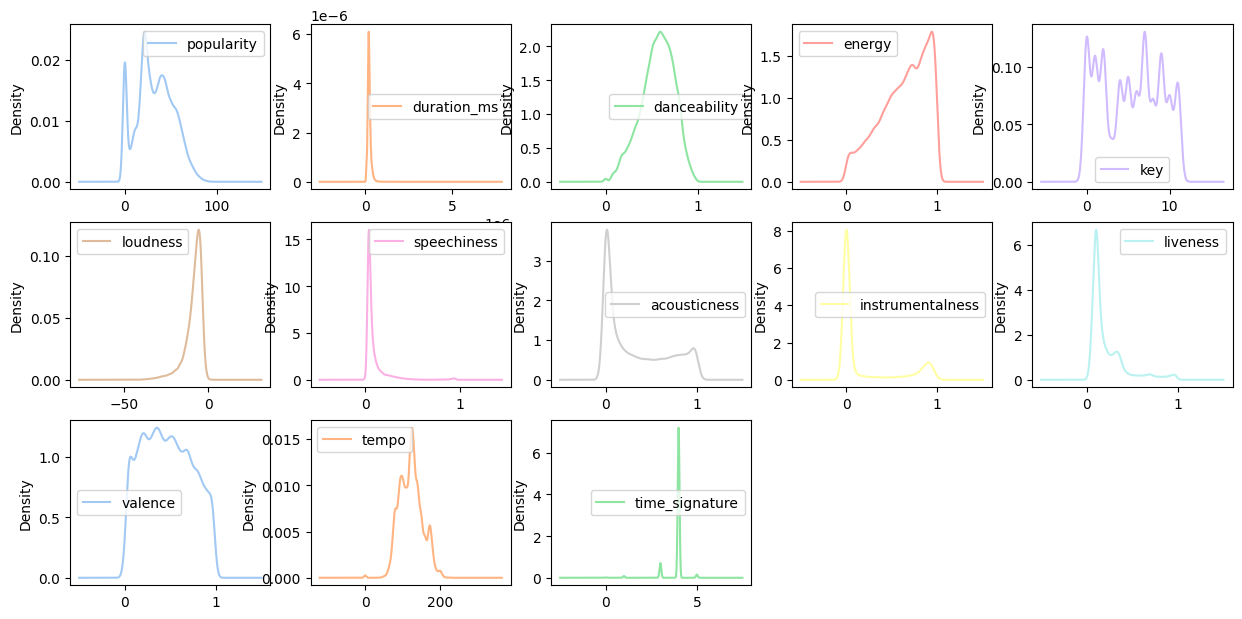

In [55]:
# Visualising the density plots  only for quantitiative and non-binary features:
final_df.drop(columns=['explicit','genre_group', 'mode']).plot(kind="density", layout=(6, 5),
                                         subplots=True, sharex=False, sharey=False, figsize=(15, 15))
plt.show()



In [58]:
# Here we investigate the skeewness
quantitative_df = final_df.select_dtypes(include='number').drop(columns=['explicit', 'mode'])

# Calculate skewness for each quantitative feature
skewness_values = quantitative_df.skew()

# Display skewness values
print(skewness_values)


#A skewness close to 0 suggests a symmetrical distribution.
#A positive skewness indicates a right-skewed distribution (tail on the right).
#A negative skewness indicates a left-skewed distribution (tail on the left).


popularity          1.25e-01
duration_ms         1.12e+01
danceability       -4.00e-01
energy             -5.63e-01
key                 2.41e-05
loudness           -1.94e+00
speechiness         4.47e+00
acousticness        6.40e-01
instrumentalness    1.45e+00
liveness            2.03e+00
valence             1.26e-01
tempo               1.60e-01
time_signature     -3.95e+00
dtype: float64


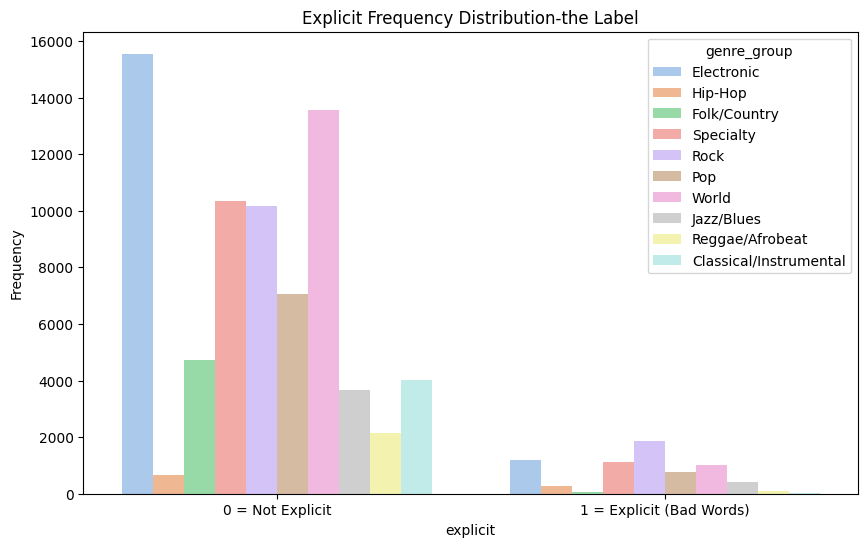

In [60]:
# Graph for explicit_cat by track_genre
plt.figure(figsize=(10, 6))

# Countplot for track_genre frequencies
sns.countplot(x='explicit', hue='genre_group', data=final_df, palette="pastel")


plt.xlabel('explicit')
plt.ylabel('Frequency')
plt.title('Explicit Frequency Distribution-the Label')

plt.xticks([0, 1], ['0 = Not Explicit', '1 = Explicit (Bad Words)'])

plt.show()

# Bar Chart for the Categorical Feature: 'Explicit' (Presence of Explicit Language).


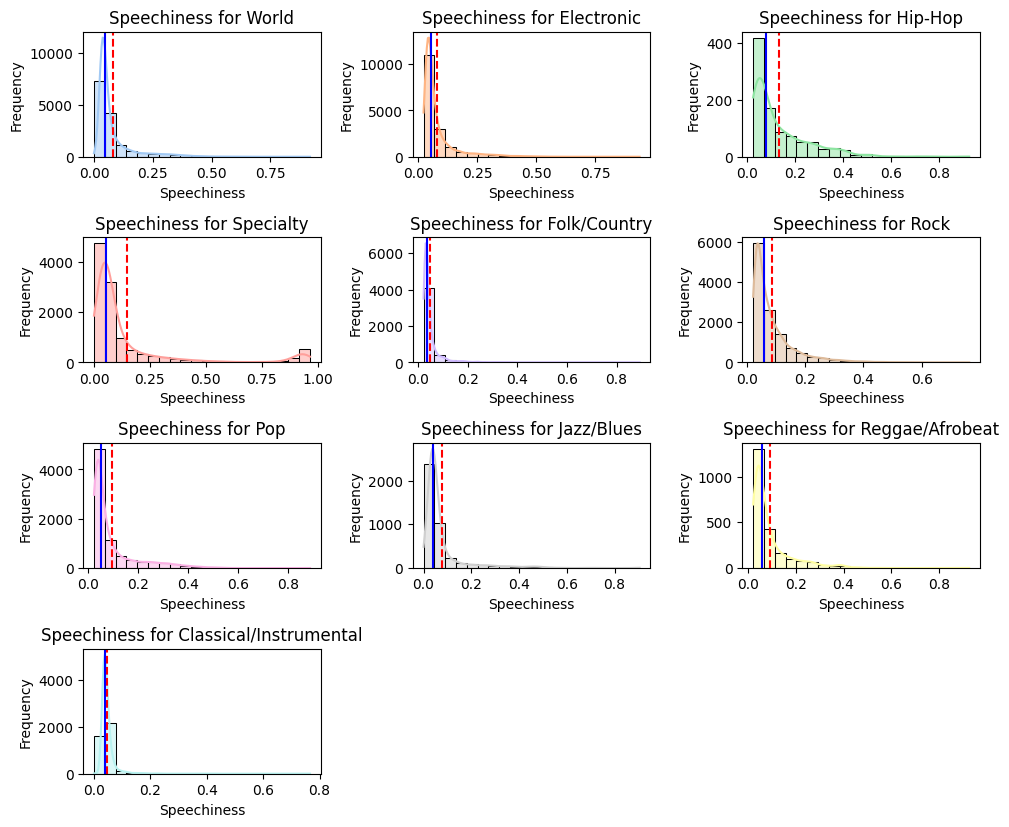

In [61]:
#what is the distribution of speechiness by track_genre?
#what is the mean and median values? WE RUN THESE FOR ALL VARIABLE-BUT IT IS NOT SHOWN IN THIS NOTEBOOK


# Get unique genres
genres = final_df['genre_group'].unique()

# Create a 2x3 grid for subplots
fig, axes = plt.subplots(5, 3, figsize=(10, 10))  # 2 rows, 3 columns

# Flatten axes array for easy indexing
axes = axes.flatten()

# Loop through each genre and plot the distribution of speechiness for that genre
for i, genre in enumerate(genres):
    df_genre = final_df[final_df['genre_group'] == genre]

    # Plot the histogram for speechiness
    sns.histplot(df_genre['speechiness'], kde=True, color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], ax=axes[i], bins=20)

    # Calculate the mean and median
    mean_speechiness = df_genre['speechiness'].mean()
    median_speechiness = df_genre['speechiness'].median()

    # Plot mean and median as vertical lines
    axes[i].axvline(mean_speechiness, color='red', linestyle='--', label=f'Mean: {mean_speechiness:.2f}')
    axes[i].axvline(median_speechiness, color='blue', linestyle='-', label=f'Median: {median_speechiness:.2f}')

    # Set labels and title
    axes[i].set_xlabel('Speechiness')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Speechiness for {genre}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()

## 2.4  **Feature engineering and Scaling**

In [62]:

#We first use log trnasformation for featuears that are heavily right-skewed, with most values near zero and a long right tail:
#  (duration_ms, speechiness, acousticness, instrumentalness).


final_df['duration_ms_log'] = np.log1p(final_df['duration_ms'])
final_df['speechiness_log'] = np.log1p(final_df['speechiness'])
final_df['acousticness_log'] = np.log1p(final_df['acousticness'])
final_df['instrumentalness_log'] = np.log1p(final_df['instrumentalness'])


print(final_df[['duration_ms', 'duration_ms_log']])


       duration_ms  duration_ms_log
0           160725            11.99
1           322933            12.69
2           515360            13.15
3           190203            12.16
4           331240            12.71
...            ...              ...
78713       325156            12.69
78714       109573            11.60
78715       260573            12.47
78716       234300            12.36
78717       144973            11.88

[78718 rows x 2 columns]


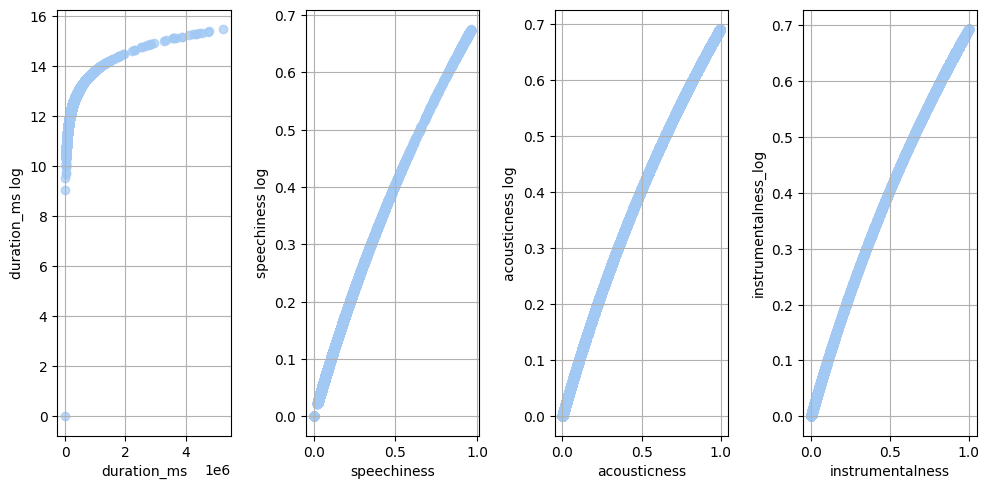

In [63]:
plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 4, 1)
plt.scatter(final_df['duration_ms'], final_df['duration_ms_log'], alpha=0.7)
plt.xlabel('duration_ms')
plt.ylabel('duration_ms log')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 4, 2)
plt.scatter(final_df['speechiness'], final_df['speechiness_log'], alpha=0.7)
plt.xlabel('speechiness')
plt.ylabel('speechiness log')
plt.grid(True)


plt.subplot(1, 4, 3)
plt.scatter(final_df['acousticness'], final_df['acousticness_log'], alpha=0.7)
plt.xlabel('acousticness')
plt.ylabel('acousticness log')
plt.grid(True)


plt.subplot(1, 4, 4)
plt.scatter(final_df['instrumentalness'], final_df['instrumentalness_log'], alpha=0.7)
plt.xlabel('instrumentalness')
plt.ylabel('instrumentalness_log')
plt.grid(True)



# Show the combined plot
plt.tight_layout()
plt.show()

In [ ]:
#Generating polynomial feature for tempo and denceability becuase they are not linear:
from sklearn.preprocessing import PolynomialFeatures


# Initialize the PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'tempo' feature
poly_features = poly.fit_transform(final_df[['tempo']])

# Get the feature names for the new polynomial features
poly_feature_names = poly.get_feature_names_out(['tempo'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names] = poly_features



poly2 = PolynomialFeatures(degree=2, interaction_only=False)

# Fit and transform the 'danceability' feature
poly_features2 = poly2.fit_transform(final_df[['danceability']])

# Get the feature names for the new polynomial features
poly_feature_names2 = poly2.get_feature_names_out(['danceability'])

# Add the polynomial features directly to the original DataFrame
final_df[poly_feature_names2] = poly_features2


print(final_df.head())




In [71]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
popularity,78718.0,32.72,19.64,0.00,19.00,3.20e+01,47.00,9.90e+01
duration_ms,78718.0,230010.64,116582.12,0.00,172333.00,2.14e+05,265961.50,5.24e+06
explicit,78718.0,0.09,0.28,0.00,0.00,0.00e+00,0.00,1.00e+00
danceability,78718.0,0.56,0.18,0.00,0.45,5.74e-01,0.69,9.85e-01
energy,78718.0,0.63,0.26,0.00,0.46,6.78e-01,0.86,1.00e+00
key,78718.0,5.28,3.56,0.00,2.00,5.00e+00,8.00,1.10e+01
loudness,78718.0,-8.61,5.34,-49.53,-10.47,-7.25e+00,-5.13,4.53e+00
mode,78718.0,0.63,0.48,0.00,0.00,1.00e+00,1.00,1.00e+00
speechiness,78718.0,0.09,0.12,0.00,0.04,4.92e-02,0.09,9.65e-01
acousticness,78718.0,0.33,0.34,0.00,0.02,1.91e-01,0.64,9.96e-01


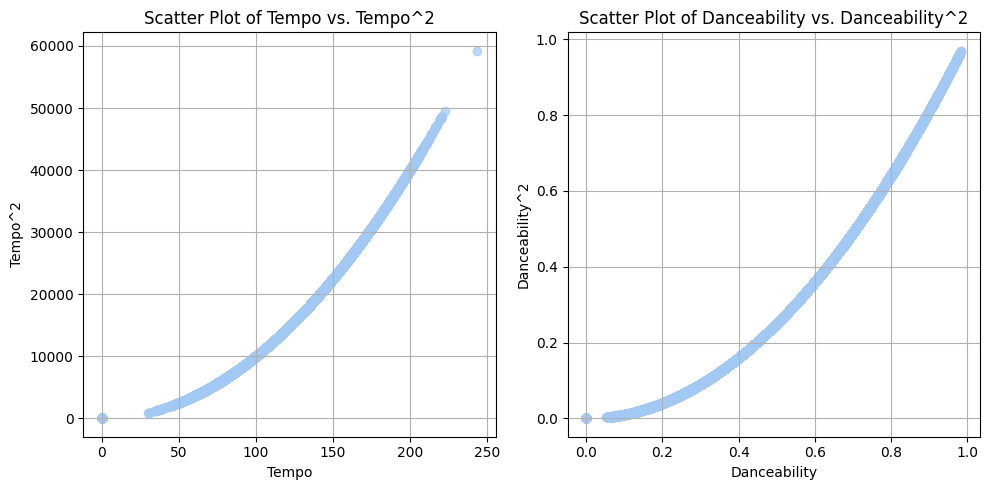

In [66]:
# Combined plot of both polynomial transformations in a single figure

plt.figure(figsize=(10, 5))

# Plotting 'tempo' vs 'tempo^2' in the first subplot
plt.subplot(1, 2, 1)
plt.scatter(final_df['tempo'], final_df['tempo^2'], alpha=0.7)
plt.title('Scatter Plot of Tempo vs. Tempo^2')
plt.xlabel('Tempo')
plt.ylabel('Tempo^2')
plt.grid(True)

# Plotting 'danceability' vs 'danceability^2' in the second subplot
plt.subplot(1, 2, 2)
plt.scatter(final_df['danceability'], final_df['danceability^2'], alpha=0.7)
plt.title('Scatter Plot of Danceability vs. Danceability^2')
plt.xlabel('Danceability')
plt.ylabel('Danceability^2')
plt.grid(True)

# Show the combined plot
plt.tight_layout()
plt.show()


In [67]:
# Creating interaction variables directly in final_df
# Interaction between 'duration_ms' and 'energy'
final_df['duration_ms_energy_interaction'] = final_df['duration_ms'] * final_df['energy']

# Interaction between 'tempo' and 'danceability'
final_df['tempo_danceability_interaction'] = final_df['tempo'] * final_df['danceability']

# Display the first few rows to verify the new interaction columns
print(final_df[['duration_ms', 'energy', 'duration_ms_energy_interaction', 'tempo', 'danceability', 'tempo_danceability_interaction']].head())


   duration_ms  energy  duration_ms_energy_interaction   tempo  danceability  \
0       160725    0.37                        60111.15  104.04          0.91   
1       322933    0.52                       166633.43  178.17          0.27   
2       515360    0.56                       288601.60  120.00          0.69   
3       190203    0.77                       146456.31  161.72          0.68   
4       331240    0.43                       142764.44  129.97          0.52   

   tempo_danceability_interaction  
0                           94.68  
1                           47.93  
2                           82.32  
3                          109.81  
4                           67.45  


Feature Engeneering

# .3. **Correlation Analysis**

In [68]:
#What is the correlation between all quantitative features in the dataset? Using Pearson correlation coefficients.
#we use Pearson correlation coefficients:
columns = ['speechiness','danceability', 'loudness', 'tempo','acousticness','energy','instrumentalness','duration_ms']

correlation_matrix = final_df[columns].corr()

print(correlation_matrix)

#Danceability and loudness have a relatively strong correlation, while loudness and speechiness show a medium correlation.
#Surprisingly, tempo and danceability have a very low correlation, which can be explained by the fact that classical tracks tend to have a high tempo and low danceability.


                  speechiness  danceability  loudness     tempo  acousticness  \
speechiness          1.00e+00      1.09e-01  5.37e-02 -1.64e-03          0.01   
danceability         1.09e-01      1.00e+00  2.81e-01 -4.04e-03         -0.18   
loudness             5.37e-02      2.81e-01  1.00e+00  2.39e-01         -0.58   
tempo               -1.64e-03     -4.04e-03  2.39e-01  1.00e+00         -0.23   
acousticness         1.06e-02     -1.81e-01 -5.79e-01 -2.29e-01          1.00   
energy               1.40e-01      1.48e-01  7.58e-01  2.67e-01         -0.73   
instrumentalness    -1.10e-01     -1.97e-01 -4.37e-01 -5.96e-02          0.09   
duration_ms         -6.04e-02     -5.11e-02 -2.36e-04  2.60e-02         -0.11   

                  energy  instrumentalness  duration_ms  
speechiness         0.14             -0.11    -6.04e-02  
danceability        0.15             -0.20    -5.11e-02  
loudness            0.76             -0.44    -2.36e-04  
tempo               0.27             -

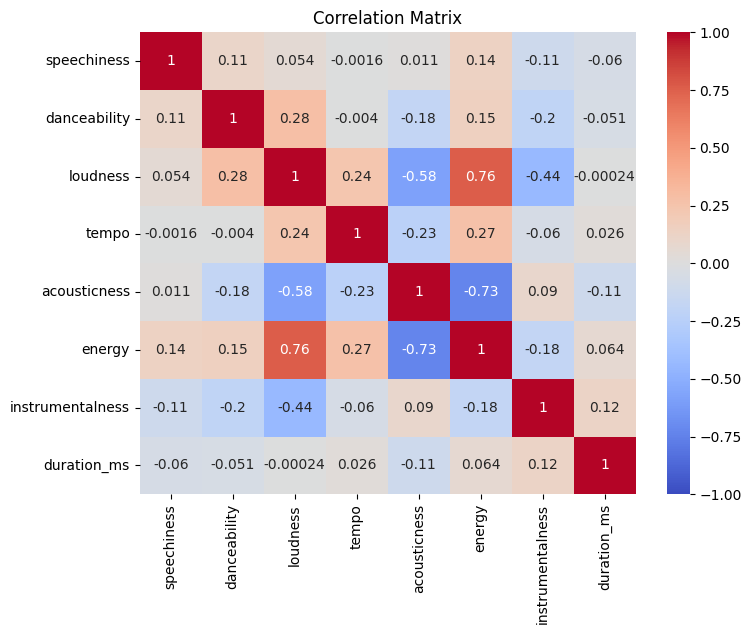

In [69]:
# Correlation plot: we did this beacuse we want to check the relationship between the features in the model and to prevent multicollinearity.
#We want to make sure that the features are not measuring the same attribute.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


#High correlations between: enrgy and loudness
                        #enrgy and acousticness
                        #loudness and acousticness...

In [73]:
df_cleaned = final_df.copy()
# Interaction terms
# Create interactions between features that may affect the outcome together
df_cleaned['energy_danceability_interaction'] = df_cleaned['energy'] * df_cleaned['danceability']
df_cleaned['speechiness_acousticness_interaction'] = df_cleaned['speechiness'] * df_cleaned['acousticness']

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Drop the original tempo column if you don't want to keep it, or modify as needed
# df_cleaned = pd.concat([df_cleaned, poly_df], axis=1)

# Log transformations to reduce skewness in highly skewed features
df_cleaned['log_duration_ms'] = np.log1p(df_cleaned['duration_ms'])  # log(1 + x) to handle zero values
df_cleaned['log_instrumentalness'] = np.log1p(df_cleaned['instrumentalness'])

# Binning the `valence` into categories (low, medium, high)
df_cleaned['valence_binned'] = pd.qcut(df_cleaned['valence'], q=3, labels=['low', 'medium', 'high'])

# Discretizing the `time_signature` since it's a categorical feature
df_cleaned['time_signature_binned'] = pd.cut(df_cleaned['time_signature'], bins=[0, 3, 4, 5], labels=['3/4', '4/4', '5/4'])

# Save the cleaned dataset
df_cleaned.to_csv('clean_engeneered_dataset.csv', index=False)

# Check the updated DataFrame
print(df_cleaned.head())

                 track_id                   artists       album_name  \
0  0000vdREvCVMxbQTkS888c                      Rill            Lolly   
1  000CC8EParg64OmTxVnZ0p                 Glee Cast  Glee Love Songs   
2  000Iz0K615UepwSJ5z2RE5  Paul Kalkbrenner;Pig&Dan                X   
3  000RDCYioLteXcutOjeweY             Jordan Sandhu       Teeje Week   
4  000qpdoc97IMTBvF8gwcpy          Paul Kalkbrenner             Zeit   

                                          track_name  popularity  duration_ms  \
0                                              Lolly          44       160725   
1  It's All Coming Back To Me Now (Glee Cast Vers...          47       322933   
2                      Böxig Leise - Pig & Dan Remix          22       515360   
3                                         Teeje Week          62       190203   
4                                               Tief          19       331240   

   explicit  danceability  energy  key  ...   tempo^2  danceability^2  \
0      

In [79]:
df_cleaned.drop(["1"], axis=1, inplace=True)


In [80]:
df_cleaned.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,tempo^2,danceability^2,duration_ms_energy_interaction,tempo_danceability_interaction,energy_danceability_interaction,speechiness_acousticness_interaction,log_duration_ms,log_instrumentalness,valence_binned,time_signature_binned
0,0000vdREvCVMxbQTkS888c,Rill,Lolly,Lolly,44,160725,1,0.91,0.37,8,...,10824.74,0.83,60111.15,94.68,0.34,1.51e-02,11.99,3.01e-03,medium,4/4
1,000CC8EParg64OmTxVnZ0p,Glee Cast,Glee Love Songs,It's All Coming Back To Me Now (Glee Cast Vers...,47,322933,0,0.27,0.52,0,...,31745.97,0.07,166633.43,47.93,0.14,1.49e-02,12.69,0.00e+00,medium,4/4
2,000Iz0K615UepwSJ5z2RE5,Paul Kalkbrenner;Pig&Dan,X,Böxig Leise - Pig & Dan Remix,22,515360,0,0.69,0.56,5,...,14399.28,0.47,288601.60,82.32,0.38,5.27e-05,13.15,1.66e-01,low,4/4
3,000RDCYioLteXcutOjeweY,Jordan Sandhu,Teeje Week,Teeje Week,62,190203,0,0.68,0.77,0,...,26153.68,0.46,146456.31,109.81,0.52,1.11e-02,12.16,0.00e+00,high,4/4
4,000qpdoc97IMTBvF8gwcpy,Paul Kalkbrenner,Zeit,Tief,19,331240,0,0.52,0.43,6,...,16892.46,0.27,142764.44,67.45,0.22,2.81e-05,12.71,5.42e-01,low,4/4


In [81]:
# Save the final DataFrame to a new CSV file
df_cleaned.to_csv('final_clean_dataset2.csv', index=False)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78718 entries, 0 to 78717
Data columns (total 34 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   track_id                              78718 non-null  object  
 1   artists                               78717 non-null  object  
 2   album_name                            78717 non-null  object  
 3   track_name                            78717 non-null  object  
 4   popularity                            78718 non-null  int64   
 5   duration_ms                           78718 non-null  int64   
 6   explicit                              78718 non-null  int64   
 7   danceability                          78718 non-null  float64 
 8   energy                                78718 non-null  float64 
 9   key                                   78718 non-null  int64   
 10  loudness                              78718 non-null  float64 
 11  mo